In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

TITULOS = {
    "silhouette": "Silhouette",
    "davies-bouldin": "Davies-Bouldin",
    "calinski-harabasz": "Calinski-Harabasz",
    "number-clusters": "Número de grupos",
    "execution-time": "Tempo de execução"
}

def boxplot_benchmark(
    csv_path,
    ax,
    titulo=None,
    log_transform=False
):
    df = pd.read_csv(csv_path, sep=",", decimal=",")

    cols = ["hybrid-sil-cpp", "romulo"]
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors="coerce")

        if log_transform:
            df[c] = df[c][df[c] > 0]   # remove zero/negativos
            df[c] = np.log10(df[c])

    bp = ax.boxplot(
        [df["hybrid-sil-cpp"].dropna(), df["romulo"].dropna()],
        tick_labels=["BRKGA", "RóMULO"],
        showfliers=True,
        patch_artist=True,
        widths=0.6,
        medianprops=dict(linewidth=2),
        boxprops=dict(linewidth=1.2),
        whiskerprops=dict(linewidth=1.2),
        capprops=dict(linewidth=1.2),
        flierprops=dict(marker="o", markersize=4, alpha=0.6)
    )

    colors = ["#4C72B0", "#DD8452"]
    for patch, color in zip(bp["boxes"], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)

    if titulo is None:
        stem = Path(csv_path).stem
        stem = stem.replace("01 - ", "").replace("01-", "").strip().lower()
        titulo = TITULOS.get(stem, stem)

    ax.set_title(titulo, fontsize=11, weight="bold")

    if log_transform:
        ax.set_ylabel("log10(Resultado)", fontsize=10)
    else:
        ax.set_ylabel("Resultado", fontsize=10)

    ax.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)


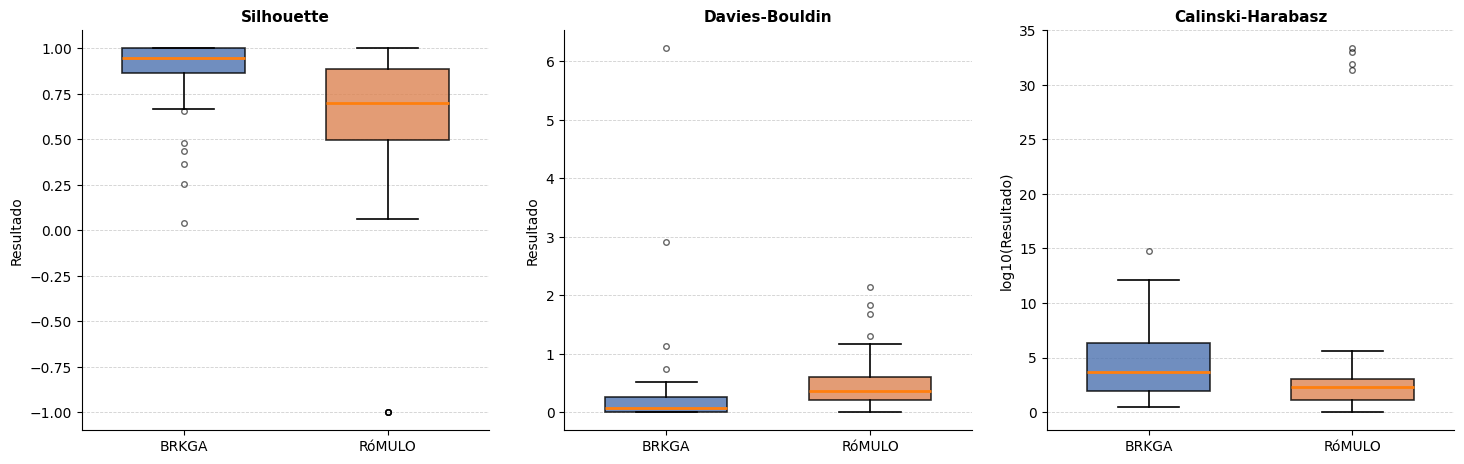

In [120]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

boxplot_benchmark("01 - silhouette.csv", axes[0])
boxplot_benchmark("01 - davies-bouldin.csv", axes[1])
boxplot_benchmark(
    "01 - calinski-harabasz.csv",
    axes[2],
    log_transform=True
)

plt.tight_layout(pad=2)
plt.show()


In [121]:
def barplot_resultado(
    csv_path,
    ax,
    titulo=None
):
    df = pd.read_csv(csv_path, sep=",", decimal=",")

    df["resultado"] = (
        df["resultado"]
        .astype(str)
        .str.strip()
        .str.capitalize()
    )

    ordem = ["Ganha ou empata", "Perde"]
    contagem = (
        df["resultado"]
        .value_counts()
        .reindex(ordem, fill_value=0)
    )

    colors = ["#4C72B0", "#55A868", "#C44E52"]

    bars = ax.bar(
        contagem.index,
        contagem.values,
        color=colors,
        alpha=0.85
    )

    if titulo is None:
        stem = Path(csv_path).stem
        stem = stem.replace("01 - ", "").replace("01-", "").strip().lower()
        titulo = TITULOS.get(stem, stem)

    ax.set_title(titulo, fontsize=11, weight="bold")
    ax.set_ylabel("Quantidade", fontsize=10)

    ax.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            h,
            f"{int(h)}",
            ha="center",
            va="bottom",
            fontsize=9
        )


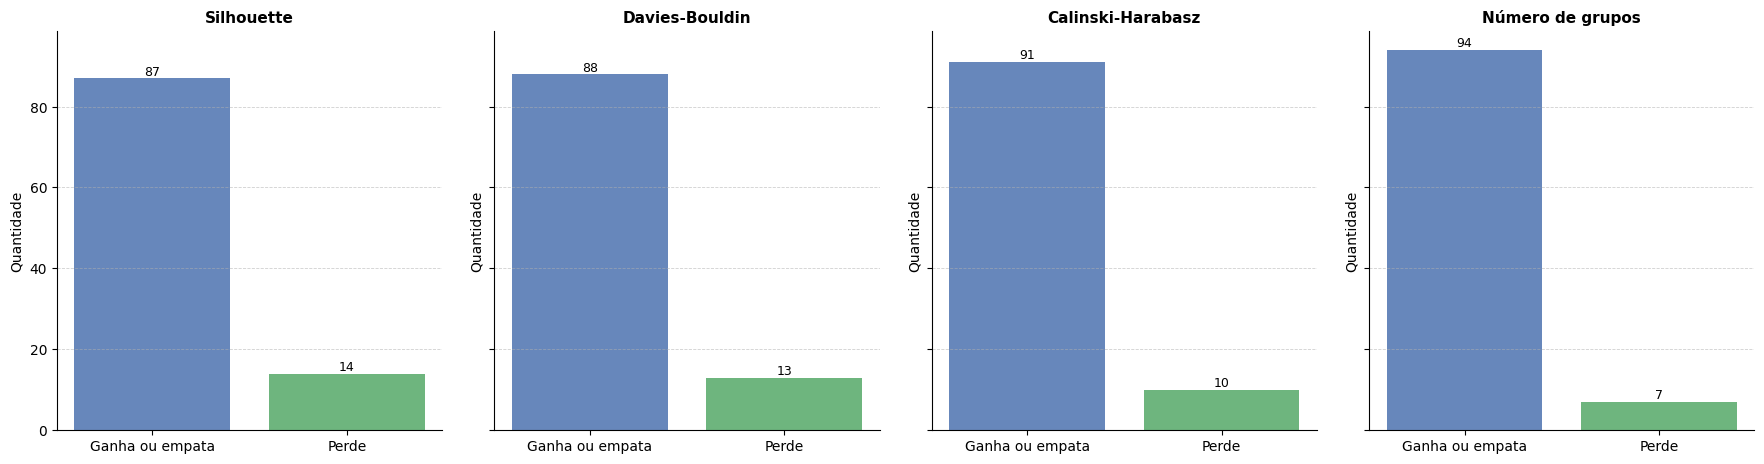

In [122]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharey=True)

files = [
    "01 - silhouette.csv",
    "01 - davies-bouldin.csv",
    "01 - calinski-harabasz.csv",
    "01 - number-clusters.csv"
]

for ax, file in zip(axes, files):
    barplot_resultado(file, ax)

plt.tight_layout(pad=2)
plt.show()


In [ ]:
def barplot_resultado_tempo(
    csv_path,
    ax,
    threads_label
):
    df = pd.read_csv(csv_path, sep=",", decimal=",")

    # normaliza texto
    df["resultado"] = (
        df["resultado"]
        .astype(str)
        .str.strip()
        .str.lower()
    )

    # mapeia categorias
    df["resultado_bin"] = df["resultado"].apply(
        lambda x: "Ganha ou Empata" if "ganha" in x or "empata" in x else "Perde"
    )

    ordem = ["Ganha ou Empata", "Perde"]
    contagem = (
        df["resultado_bin"]
        .value_counts()
        .reindex(ordem, fill_value=0)
    )

    colors = ["#4C72B0", "#C44E52"]

    bars = ax.bar(
        contagem.index,
        contagem.values,
        color=colors,
        alpha=0.85
    )

    ax.set_title(threads_label, fontsize=11, weight="bold")
    ax.set_ylabel("Quantidade", fontsize=10)

    ax.grid(True, axis="y", linestyle="--", linewidth=0.6, alpha=0.6)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    # rótulos nas barras
    for bar in bars:
        h = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            h,
            f"{int(h)}",
            ha="center",
            va="bottom",
            fontsize=9
        )


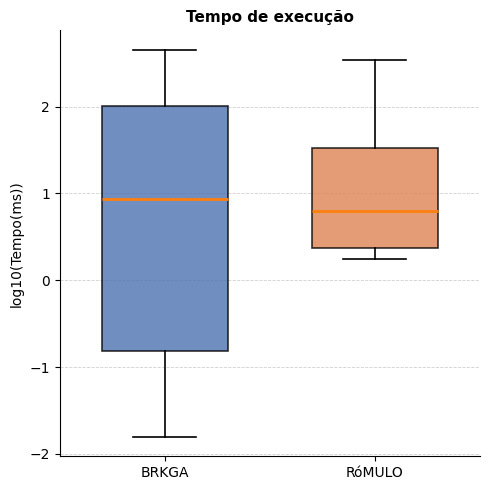

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

barplot_resultado_tempo(
    "02 - time.csv",
    axes[0],
    threads_label="1 thread"
)

barplot_resultado_tempo(
    "01 - time.csv",
    axes[1],
    threads_label="12 threads"
)

plt.tight_layout(pad=2)
plt.show()
